In [1]:
import torch
from torchps.flat_phase_space_generator import FlatInvertiblePhasespace
#from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
torch.set_default_dtype(torch.double)

In [2]:
import sys
sys.path.append("/home/valsdav/code/MEM/LHAPDF-6.5.3_install/lib/python3.9/site-packages")
import lhapdf
pdf = lhapdf.mkPDF("NNPDF40_nnlo_hessian_pdfas",0)

LHAPDF 6.5.3 loading /opt/LHAPDF/share/LHAPDF/NNPDF40_nnlo_hessian_pdfas/NNPDF40_nnlo_hessian_pdfas_0000.dat
NNPDF40_nnlo_hessian_pdfas PDF set, member #0, version 1; LHAPDF ID = 331600


In [3]:
TOP_MASS = 172.76
HIGGS_MASS = 125.25
E_CM = 13000

In [5]:
gen = FlatInvertiblePhasespace([21.,21.],[HIGGS_MASS, TOP_MASS, TOP_MASS], 
                                   pdf=pdf, pdf_active=True, tau=False)
gen_tau = FlatInvertiblePhasespace([21.,21.],[HIGGS_MASS, TOP_MASS, TOP_MASS], 
                                   pdf=pdf, pdf_active=True, tau=True)

In [67]:
gen.nDimPhaseSpace()

5

In [80]:
fsg.FlatInvertiblePhasespace.get_flatWeights(13000, 3)

21291.052028166854

generateKinematics_batch(self, E_cm, random_variables_full, pT_mincut=-1, delR_mincut=-1, rap_maxcut=-1,pdgs=[0,0]):

In [172]:
r = torch.rand(100, 7)
r

tensor([[0.1268, 0.9856, 0.9902, 0.3006, 0.6314, 0.5184, 0.2072],
        [0.1347, 0.0535, 0.1078, 0.0278, 0.7642, 0.2792, 0.6301],
        [0.5866, 0.3117, 0.9626, 0.5203, 0.4116, 0.9362, 0.3486],
        [0.4976, 0.0149, 0.3283, 0.5872, 0.1424, 0.4038, 0.8099],
        [0.0287, 0.8760, 0.1167, 0.7358, 0.2305, 0.9078, 0.2142],
        [0.5236, 0.8193, 0.7727, 0.0342, 0.2146, 0.8713, 0.5528],
        [0.0043, 0.4964, 0.3268, 0.6690, 0.6487, 0.0765, 0.0665],
        [0.7078, 0.4345, 0.2146, 0.8807, 0.0545, 0.5419, 0.2972],
        [0.3576, 0.4640, 0.7498, 0.9410, 0.5506, 0.1588, 0.9410],
        [0.6635, 0.5941, 0.5361, 0.7453, 0.4439, 0.9054, 0.5831],
        [0.8074, 0.5673, 0.7294, 0.1959, 0.5776, 0.3453, 0.5362],
        [0.4295, 0.5974, 0.2770, 0.1725, 0.3178, 0.4934, 0.3479],
        [0.5901, 0.5845, 0.9501, 0.9249, 0.4701, 0.1313, 0.3838],
        [0.2603, 0.4881, 0.2398, 0.7512, 0.5560, 0.3034, 0.8244],
        [0.5268, 0.8325, 0.7143, 0.7471, 0.4676, 0.0408, 0.3224],
        [0

In [173]:
p, w = gen.generateKinematics_batch(E_CM, r)
p_tau, w_tau = gen_tau.generateKinematics_batch(E_CM, r)

In [86]:
p[:,0,0]

tensor([4502.7980, 2729.3692, 5428.0101,  ..., 1310.4760,  703.0042,
        3569.9373])

## Debugging plots

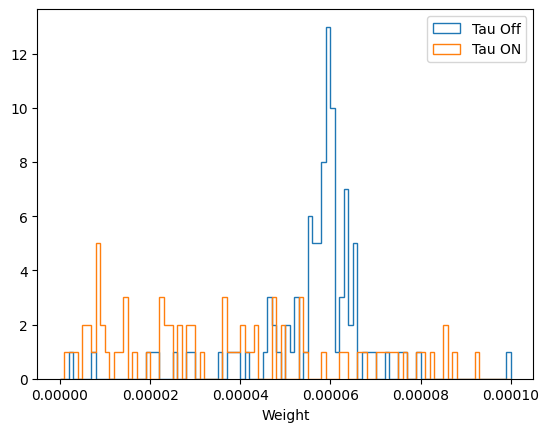

In [174]:
plt.hist(w, bins=100,range=(0,1e-4),histtype="step", label="Tau Off")
plt.hist(w_tau, bins=100, range=(0,1e-4), histtype="step", label="Tau ON")
#plt.yscale("log")
plt.xlabel("Weight")
plt.legend()

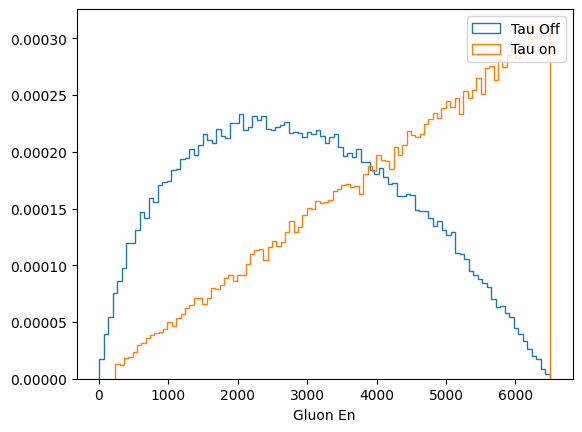

In [165]:
plt.hist(p[:,0,0], bins=100, density=True, histtype="step", label="Tau Off")
plt.hist(p_tau[:,0,0], bins=100, density=True, histtype="step", label="Tau on")
plt.xlabel("Gluon En")
plt.legend()

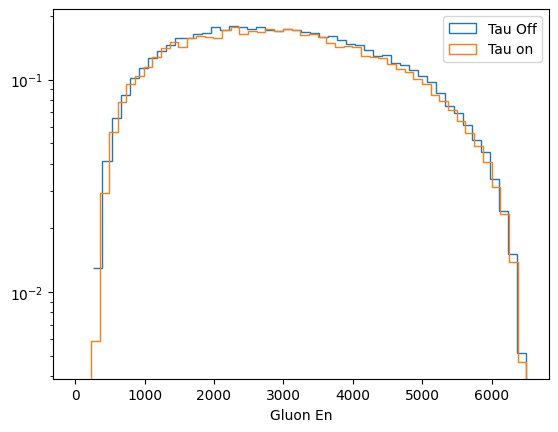

In [162]:
plt.hist(p[:,0,0], weights=w, bins=50,  histtype="step", label="Tau Off")
plt.hist(p_tau[:,0,0], weights=w_tau, bins=50, histtype="step", label="Tau on")
plt.xlabel("Gluon En")
plt.yscale("log")
plt.legend()

In [107]:
p[:,3,1].numpy()

array([-2353.10259818,  -951.00243539, -4810.20655592, ...,
         614.69732407,  -594.68344987,  1874.28487495])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


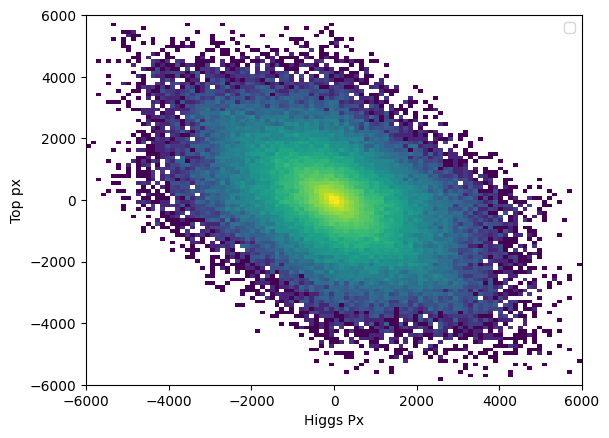

In [114]:
plt.hist2d(p[:,2,1].numpy(),p[:,3,1].numpy(), range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, norm=colors.LogNorm())
plt.xlabel("Higgs Px")
plt.ylabel("Top px")
plt.legend()

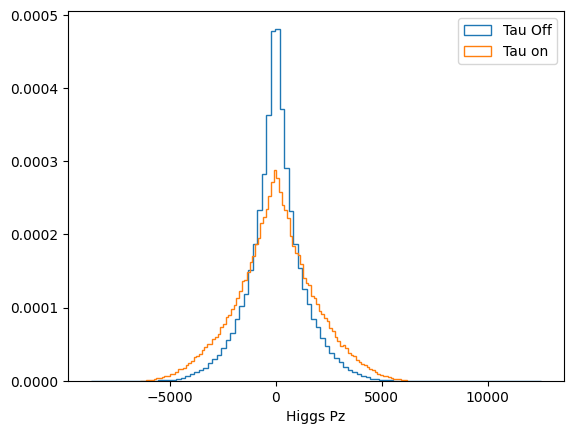

In [99]:
plt.hist(p[:,2,3], bins=100, density=True, histtype="step", label="Tau Off")
plt.hist(p_tau[:,2,3], bins=100, density=True, histtype="step", label="Tau on")
plt.xlabel("Higgs Pz")
plt.legend()

/home/valsdav/code/MEM/myenv/lib64/python3.9/site-packages/numpy/core/shape_base.py:121: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/valsdav/code/MEM/myenv/lib64/python3.9/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

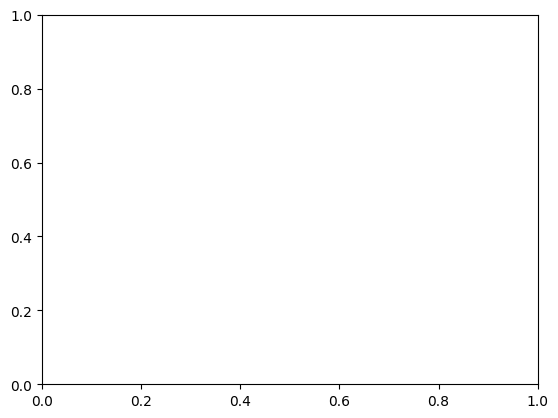

In [63]:
plt.hist2d(w, p[:,0,0])